<a href="https://colab.research.google.com/github/imugagga/Sales-Predictions---JFood-Sores/blob/main/Sales_Predictions_Mugagga_Innocent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales-Predictions---JFood-Sores

In [266]:
#Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [267]:
#Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config
set_config(display='diagram')

In [268]:
#Read the data to the colab notebook
filepath = '/content/drive/MyDrive/Colab Notebooks/Week 1/Uploaded Data/sales_predictions.csv'
Originalfile = pd.read_csv(filepath)

In [269]:
#View Data Head

df = Originalfile.copy()
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [270]:
#View Data tail
df.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


*Data Inspection*

In [271]:
# No. rows and columns?
df.shape

(8523, 12)

In [272]:
#length of data
len(df)

8523

In [273]:
# Datatypes of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [274]:
# Checking for duplicates
df.duplicated().sum()

0

In [275]:
#View Columns with missing Values
df.isnull().sum()   # 2 columns with missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [276]:
#Inspect the number of unique values in each of the columns 
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [277]:
#Inspect the number of unique values in each of the columns with missing data.
df[['Item_Weight','Outlet_Size']].nunique()

Item_Weight    415
Outlet_Size      3
dtype: int64

In [278]:
#Impect the columns with the missing values
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

*Address the missing values*

In [279]:
#For the Column 'Outlet_Size'

#View the percentage of missing data 
#Count the Non null Value
Non_nullcells = df['Outlet_Size'].count()

#Obtain the length of the column
Totalcells = len(df['Outlet_Size'])
#Calculate the percentage of the missing data
Empty_cells = Totalcells - Non_nullcells
Percent = ((Empty_cells/Totalcells)*100).round(2)
print(f'The empty cells are {Empty_cells} and they are {Percent}% of the data in the column')

The empty cells are 2410 and they are 28.28% of the data in the column


In [280]:
#Relating the Column with the 'Outlet_size' column

df.groupby(['Outlet_Size'])['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
Name: Outlet_Type, dtype: int64

***Explanation for Outlet_Size:***

From the observation above the most supermarkets are of the medium size and thus the missing values in this column shall be filled with the medium size  obtained using the mode function so as not to loose the data in this column.

1. The Missing data is a small percentage ie 28.28 % of the data in the column 
2. Droping the column would mean loosing the entire column attribute of the data
3. Dropping the rows would mean loosing all sale details from 2410 entries from the data set. 

In [281]:
#For the Column 'Item_Weight'

#View the percentage of missing data 
#Count the Non null Value
Non_nullcells1 = df['Item_Weight'].count()

#Obtain the length of the column
Totalcells1 = len(df['Item_Weight'])
#Calculate the percentage of the missing data
Empty_cells1 = Totalcells1 - Non_nullcells1
Percent1 = ((Empty_cells1/Totalcells1)*100).round(2)
print(f'The empty cells are {Empty_cells1} and they are {Percent1}% of the data in the column')

The empty cells are 1463 and they are 17.17% of the data in the column


***Explanation for Item_Weight:***

Since the Weight of the items purchased is numeriacal and it's a very important attribute, it will help to tell consumption patterns and further analysis in future , i dont want to drop the column thus i have chosen to replace the missing values with the median of the column data.

1. The Missing data is a small percentage ie 17.17 % of the data in the column
2. Droping the column would mean loosing the entire column attribute of the data
3. Dropping the rows would mean loosing all sale details from 1463 entries from the data set.

In [282]:
#Obtaining the mode of the column 'Outlet_Size'.
Size_mode = df['Outlet_Size'].mode()[0]

#Filling empty cells
df['Outlet_Size'].fillna(Size_mode,inplace=True)

print('Mode used is: ',Size_mode)

Mode used is:  Medium


In [283]:
#Obtaining the Median of the column 'Item_Weight'.
Weight_median = df['Item_Weight'].median()

#Filling empty cells
df['Item_Weight'].fillna(Weight_median,inplace=True)

print('Median used is: ',Weight_median)

Median used is:  12.6


In [284]:
#Inspecting the cleaned dataframe
df.isnull().sum()
#From this the outpuit confirms that all missing values have been filled up.

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

***Checking for any inconsistances in the Data***

In [285]:
#Selecting columns with object data type
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       8523 non-null   object
 1   Item_Fat_Content      8523 non-null   object
 2   Item_Type             8523 non-null   object
 3   Outlet_Identifier     8523 non-null   object
 4   Outlet_Size           8523 non-null   object
 5   Outlet_Location_Type  8523 non-null   object
 6   Outlet_Type           8523 non-null   object
dtypes: object(7)
memory usage: 466.2+ KB


In [286]:
df.select_dtypes(include=['object']).nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [287]:
#Identifying the inconsistent data in the column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [288]:
#Fixing the inconsistent data using the replace function.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat').replace('reg','Regular')

In [289]:
#Confirming that the  column data is consistent
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [290]:
#Obtain the summary statistics for numerical columns.
df.describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000,8523.000,8523.000,8523.000,8523.000
mean,12.813,0.066,140.993,1997.832,2181.289
std,4.227,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,9.310,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.000,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


In [291]:
#View a sample of the Cleaned Dataframe
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*1. Histogram to view the distributions of various features in the dataset.*

<ipython-input-292-fd2defb6353e>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


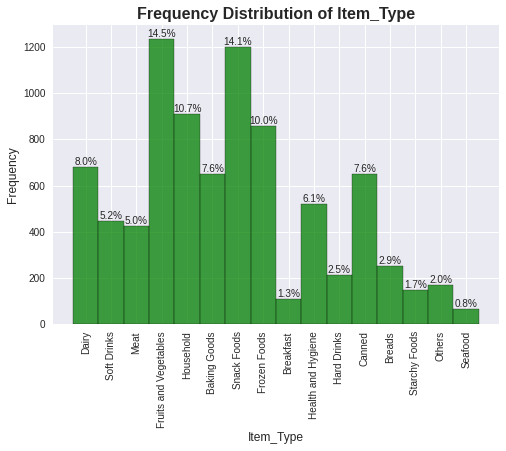

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histogram
plt.style.use('seaborn')
sns.histplot(data=df['Item_Type'], color='Green')

# Add percentage values to each bin
n = len(df['Item_Type'])
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / n)
    plt.gca().text(p.get_x() + p.get_width() / 2, p.get_height(), percentage,
                   ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xticks(rotation=90)
plt.xlabel('Item_Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Item_Type', fontweight='bold', fontsize=16)

# Display plot
plt.show()

<ipython-input-293-83b295c8ed03>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


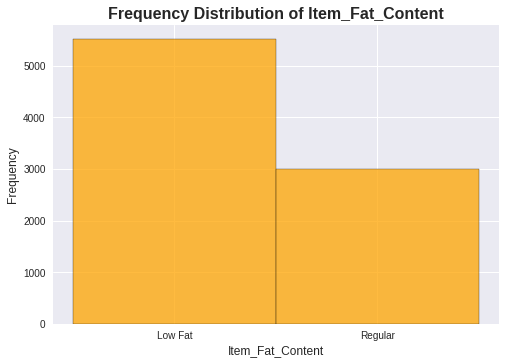

In [293]:
#Using a Histogram  to show the Frequency of Requests by Item type 
plt.style.use('seaborn')
sns.histplot(data = df['Item_Fat_Content'],color='Orange')
plt.xticks(rotation = 0)
plt.xlabel('Item_Fat_Content', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Item_Fat_Content',fontweight='bold',fontsize=16)
plt.show()

# Comments from the Plots:

*Frequency Distribution of Item_Type*
1. It can be observed that Fruits and Vegetables are most frequently requested and are the main driving items for the overall sales, followed by Snack Foods and in a very close range and then Household. These items should be stocked more often.
2. Seafood and Breakfast have very little contribution to the overall sales.

*Frequency Distribution of Item_Fat_Content*
1. The graph indicates that there is a higher demand for items of Low Fat content than the Regular content.

In [294]:
#The same can also be observed by  taking a count on the Items.
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

*2. Boxplot to view statistical summaries of various features in your dataset.*

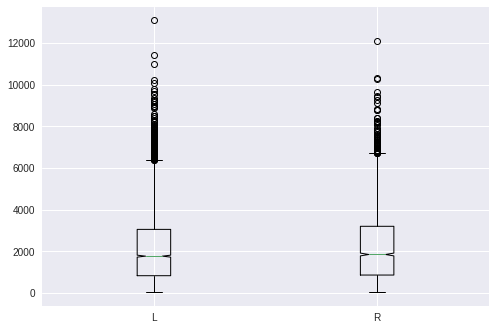

In [295]:
#Using a Boxplot to show the consumption of the top 4 items based on Weights of items purchased.
Lowfat = df.loc[df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales'].values
Regular = df.loc[df['Item_Fat_Content']=='Regular','Item_Outlet_Sales'].values
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([Lowfat,Regular], notch = True, labels=['L', 'R'])
plt.show()

Explanation:
 Both the Low fat and Reguilar items have the same median  but there are sdo many outliers.

*3. Heatmap of the correlation between features.*

In [296]:
#Adding a new column to categorise Fat content
df['Fat_Content'] = df['Item_Fat_Content'].apply(lambda x: 1 if x=='Low Fat' else(2))
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2


<Axes: >

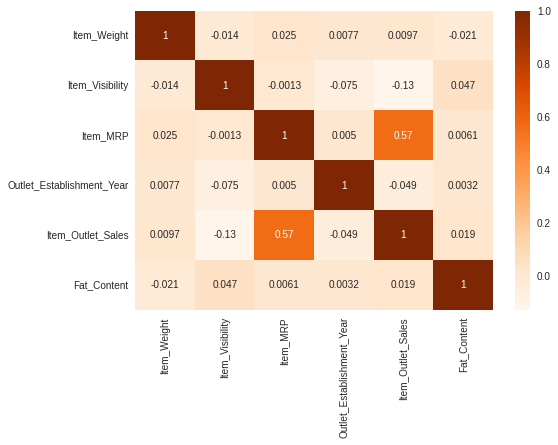

In [297]:
#Correlation  heatmap using the Pearson method
Corr = df.corr(method='pearson')
sns.heatmap(Corr,cmap = 'Oranges',annot=True)

<Axes: >

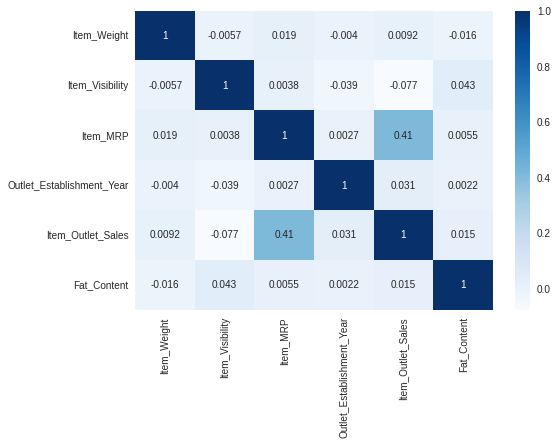

In [298]:
#Correlation  heatmap using the kendall method
Corr = df.corr(method='kendall')
sns.heatmap(Corr,cmap = 'Blues',annot=True)

# Explanation:
1. From the heat maps there is a moderate correlation between the Item_MRP and the item Outlet sales. 
2. There is very little correlation between the the rest of the items.


In [299]:
#View the Datahead
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1


In [300]:
#View Stores performance by Size
GroupedSales =  df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum()
Outletsize = list(GroupedSales.index)
Outletsize

['High', 'Medium', 'Small']

In [301]:
Outletsales = list(GroupedSales.values)
Outletsales

[2142663.5782, 11882249.635, 4566212.1972]

<ipython-input-302-a0091bcea6da>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


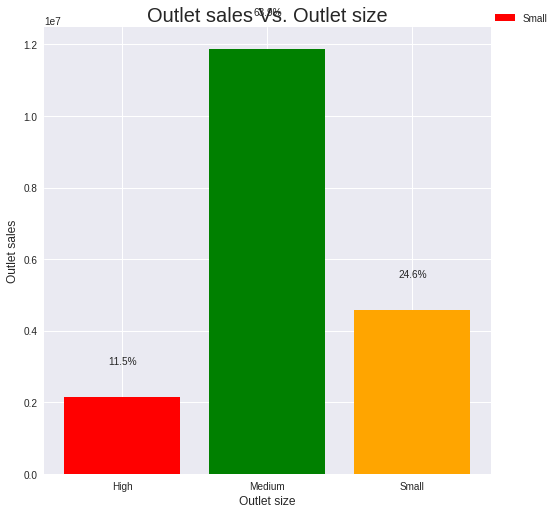

In [302]:
#Set style
plt.style.use('seaborn')

# Calculate the total sales
total_sales = sum(Outletsales)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,8))

# Plot the data as a bar plot
ax.bar(Outletsize, Outletsales, color=['red', 'green', 'orange'])

# Set the legend
labels = ['Small', 'Medium', 'Large']
plt.legend(labels, loc=(1,1))

# Set the axis labels and title
ax.set_xlabel('Outlet size', fontsize=12)
ax.set_ylabel('Outlet sales', fontsize=12)

ax.set_title('Outlet sales Vs. Outlet size', fontsize=20)

# Add percentage labels above each bar
for i, v in enumerate(Outletsales):
    percent = '{:.1f}%'.format((v / total_sales) * 100)
    ax.text(i, v + 0.05 * total_sales, percent, ha='center', fontsize=10)

# Adjust the position of the title
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()


In [303]:
#View Stores performance by Outlet type
GroupedSales2 =  df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()
Outlet_Type2 = list(GroupedSales2.index)
Outlet_Type2

['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

In [304]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

*Observation:*

The Medium sized outlets have done hightest with sales, followed by the small sized outlets. 

In [305]:
Outlet_Type2_sales = list(GroupedSales2.values)
Outlet_Type2_sales

[368034.266, 12917342.263, 1851822.83, 3453926.0513999998]

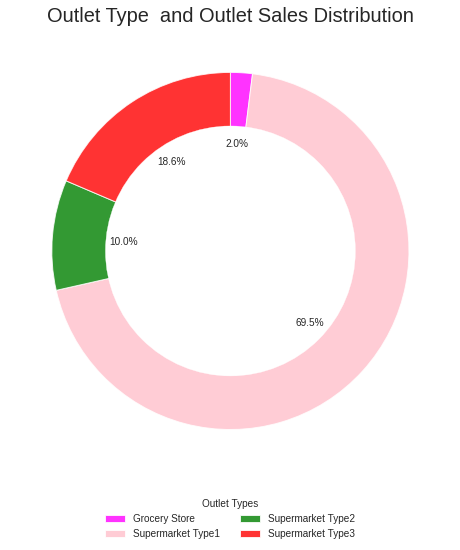

In [306]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,12))

# Plot the data as a pie chart
colors = ['magenta', 'pink', 'green', 'red']
wedges, labels, autopct = ax.pie(Outlet_Type2_sales, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.5))
plt.setp(labels, fontsize=12, fontweight='bold')

# Add a shadow to the wedges
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(1)
    wedge.set_alpha(0.8)

# Add a legend
ax.legend(wedges, Outlet_Type2, title='Outlet Types', loc='center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=10)

# Set the axis title
ax.set_title('Outlet Type  and Outlet Sales Distribution', fontsize=20)

# Add a circle at the center to make it a donut chart
circle = plt.Circle((0,0), 0.7, color='white')
ax.add_artist(circle)

# Set the aspect ratio to be equal to make it a circle
ax.set(aspect="equal")

# Show the plot
plt.show()


**Explanation**

It can be observed that the Supermarkets of Type1 have contributed well to the overall sales ie 69.5% and GRocery Stores have contributed the least to the overall sales.

In [307]:
# Understanding the performance of the top 3 items in the differnt stores

#Finding the Top sales Items in Descending Order
Groupedsales = df.groupby('Item_Type').agg({'Item_Type':'first','Item_Outlet_Sales':'sum'})
#Sort sales in Descending Order
Groupedsales = pd.DataFrame(Groupedsales['Item_Outlet_Sales'].astype(int).sort_values(ascending=False))
Groupedsales.reset_index()

,Item_Type,Item_Outlet_Sales
0,Fruits and Vegetables,2820059
1,Snack Foods,2732786
2,Household,2055493
3,Frozen Foods,1825734
4,Dairy,1522594
5,Canned,1444151
6,Baking Goods,1265525
7,Health and Hygiene,1045200
8,Meat,917565
9,Soft Drinks,892897


In [308]:
#Taking the top 6 selling Items that made bove 1.800,000 sales
Topitems_df = Groupedsales[Groupedsales['Item_Outlet_Sales']>1800000]
Topitems = list(Topitems_df.index)
Topitems

['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods']

In [309]:
#DataFrame for Top items
df3 = df[df['Item_Type'].isin(Topitems)]
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Fat_Content
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,2
7,FDP10,12.60,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986,2


In [310]:
Pivot_table = df3.pivot_table(index='Item_Type', columns='Outlet_Identifier',values ='Item_Outlet_Sales', aggfunc='sum')
Pivot_table

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Type,,,,,,,,,,
Frozen Foods,17942.6442,203696.8494,239347.1104,183599.0106,15252.8122,316272.3108,213487.4384,177020.2408,243236.7140,215879.6578
Fruits and Vegetables,24548.0460,341526.7706,319504.1040,263471.7076,24054.0224,576028.1886,304647.4428,326414.4422,304751.3076,335113.7850
Household,25550.0750,248046.4532,222526.3392,196267.1872,18157.0318,378299.5704,269852.7348,222456.4302,219520.2522,254817.6392
Snack Foods,25942.8970,309246.1234,311071.0812,278714.5328,25653.2740,513088.1172,355573.8190,288438.5418,274813.6106,350244.0900


<ipython-input-311-dffafef61095>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'OUTLET PERFORMANCE ON TOP ITEMS')

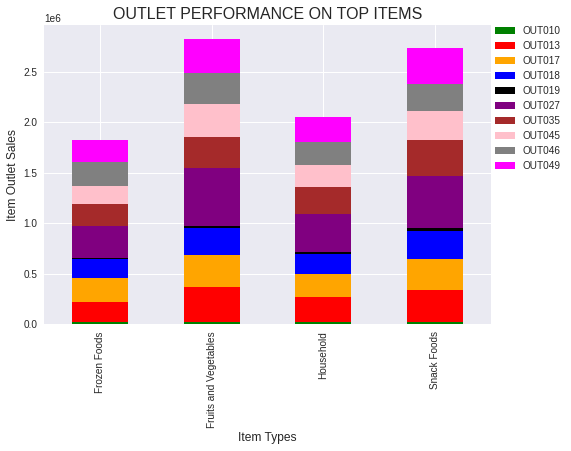

In [311]:
# Make the style by default seaborn
plt.style.use('seaborn')
Pivot_table.plot(kind = 'bar', stacked=True, color = ['Green','Red','Orange','Blue','Black','Purple','Brown','Pink','Grey','Magenta'])
plt.legend(loc=[1,0.5])
plt.xlabel('Item Types', fontsize = 12)
plt.ylabel('Item Outlet Sales', fontsize = 12)
plt.title('OUTLET PERFORMANCE ON TOP ITEMS', fontsize = 16)

**From the Results** 
```
    1. From the plot. The outlet OUT027, has contributed the most towards the sales,and most of the sales in all the top items selected in from the items sold.
    2. In all stores, the fruits and vegetables together with the Snack Foods contibute to the most sales. while the frozen Foods and the HouseHold items are in a close range.
    3. Outlets OUT10 and OUT19  are contibuting very less  to the sales as compared with the other outlets in the selected items.
```

# **Machine Learning**

In [312]:
#Recalling the Original file 
df1 = Originalfile.copy()
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [313]:
#Re_inspecting the Dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [314]:
#Inspect the number of unique values in each of the columns 
df1.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [315]:
#Taking a look at the Object columns to find the Features
df1.select_dtypes(include='object').head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [316]:
#Taking a look at the Object columns to find the Features
df1.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [317]:
df1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [318]:
df1['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [319]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [320]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [321]:
df1.select_dtypes('number').nunique()

Item_Weight                   415
Item_Visibility              7880
Item_MRP                     5938
Outlet_Establishment_Year       9
Item_Outlet_Sales            3493
dtype: int64

*1. Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix*.  

*Numerical Features*

1. Item_Weight 
2. Item_Visibility
3. Item_MRP
4. Outlet_Establishment_Year

*Ordinal Features*

1. Outlet_Size
2. Item_Fat_Content

*Nominal Features*

1. Item_Identifier
2. Item_Type 
3. Outlet_Identifier
5. Outlet_Location_Type
6. Outlet_Type


In [322]:
#1. Ordinal Encoding of the Ordinal Features.

#Outlet_size
Outlet_Size_dict = {'Small':0,'Medium':1,'High':2}
df1['Outlet_Size'].replace(Outlet_Size_dict,inplace=True)

#Item_Fat_Content
Item_Fat_Content_dict = {'LF':0,'low fat':0,'Low Fat':0,'reg':1,'Regular':1} 
df1['Item_Fat_Content'].replace(Item_Fat_Content_dict,inplace=True)

In [323]:
#Original Data Shape
df1.shape

(8523, 12)

*Data Spliting*

```
1. Training Data
2. Testing Data
```

In [324]:
#2. The Validation split into test and train data.
#Define the features
X = df1.drop(columns=['Item_Outlet_Sales'])
#Define the target
y = df1['Item_Outlet_Sales']

#Split the Dataset
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state = 42)

In [325]:
#Test datashape
X_train.shape

(6392, 11)

In [326]:
#3. Instantiate Column type Selectors
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

*Instantiate Transformers.*

```
1. SimpleImputer : 'most_frequent' and 'mean'
2. StandardScaler
3. OneHotEncoder
```

In [327]:
#4. Imputing missing values.

#Simple Imputer
# most_frequent Strategy on the Categorical Features and mean on the numerical columns
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

#Scaler
Scaler = StandardScaler()

#One-Hot-Encoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)

*Instantiate Pipelines*

```
I will use two different pipelines. 
1. One for numerical data 
2. One for nominal categorical data
```



In [328]:
#Numerical Data.
numerical_pipeline = make_pipeline(mean_imputer, Scaler)
numerical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [329]:
#Categorical data
categorical_pipeline = make_pipeline(freq_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

*Create a preprocessing object to prepare the dataset for Machine Learning*

*Instantiate ColumnTransformer*

Using the Make_column_transformer which uses tuples to match the transformers with the datatypes they should act on. 

In [330]:
#Instantiate the Column transformers.
#Tuples for Columns transformers
numerical_tuple = (numerical_pipeline, num_selector)
categorical_tuple = (categorical_pipeline, cat_selector)

#Columns Transformer
Column_transformer = make_column_transformer(numerical_tuple,categorical_tuple,remainder='passthrough')
Column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f215725c820>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f215725ce50>)])

# **A linear regression model to predict sales.**

In [331]:
#Instantiate the model
reg = LinearRegression()

In [332]:
#Create a modeling pipeline
reg_pipe = make_pipeline(Column_transformer, reg)

#Train the model on the training data.
reg_pipe.fit(X_train, y_train)

#Make predictions using the testing data.
predictions = reg_pipe.predict(X_test)

In [333]:
#Create the model Predictions.
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [334]:
#View the Predictions on the original data set
test_pred_df = X_test.copy()
test_pred_df['True Median Price'] = y_test
test_pred_df['Predicted Median Price'] = test_pred
test_pred_df['Error'] = test_pred - y_test
test_pred_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,True Median Price,Predicted Median Price,Error
7503,FDI28,14.300,0,0.026300,Frozen Foods,79.4302,OUT013,1987,2.0,Tier 3,Supermarket Type1,1743.0644,853.50,-889.5644
2957,NCM17,7.930,0,0.071136,Health and Hygiene,42.7086,OUT046,1997,0.0,Tier 1,Supermarket Type1,356.8688,1061.25,704.3812
7031,FDC14,14.500,1,0.041313,Canned,42.0454,OUT049,1999,1.0,Tier 1,Supermarket Type1,377.5086,1313.00,935.4914
1084,DRC36,NaN,1,0.044767,Soft Drinks,173.7054,OUT027,1985,1.0,Tier 3,Supermarket Type3,5778.4782,3704.50,-2073.9782
856,FDS27,10.195,1,0.012456,Meat,197.5110,OUT035,2004,0.0,Tier 2,Supermarket Type1,2356.9320,1856.50,-500.4320


**Evaluating the performance of the model based on the r^2 Metrics**
```
The R2 score is also called the coefficient of determination.
It describes the percentage of the variation in the target variable that a model can explain by using all the features together.

In this metrix, A higher score on the testing data is desirable.


```



In [335]:
#calculating the R2 score in NumPy:
train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(f'Model Training r2 : {train_r2}')
print(f'Model Testing r2  : {test_r2}')

Model Training r2 : 0.67147019318097
Model Testing r2  : 0.00022356012209512772


**From the Results.**

```
This score means that the model can account for 67.14% of the variation training data, 
but could  not account for the variations in the testing dataset.

Therefore this model is over fitting on the data set.
```

**Evaluating the performance of the model based on rmse.**

```
Root mean squared error is the square root of the mean squared error.
In this Metrix, A lower RMSE is desired.
```







In [336]:
#There is no Scikit-Learn function to calculate RMSE, 
#But we can use sklearn to find the MSE and just include the square root step.

train_MSE = mean_squared_error(y_train,train_pred)
test_MSE = mean_squared_error(y_test, test_pred)

train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Model Training RMSE  :{train_RMSE}')
print(f'Model Testing RMSE   :{test_RMSE}')

Model Training RMSE  :986.0375844280392
Model Testing RMSE   :2082210709241.673


**From the Results**

```
In this case, we can see that our RMSE is significantly very large.
This tells us that the model is it is making very large errors
```

# **A regression tree model to predict sales.**

*Using the Random Forest Model.*

**Steps**
```
1. Identify Missing values and Inconsistent Categories
2. Impute the Missing values
3. One Hot Encode any nominal features.
4. Ordinal encode any ordinal features.
5. No Scaling is Requiredz
6. Instantiate pipelines and  Column tranformers.
```





In [337]:
#View the Data
#Recalling the Original file 
dfz = Originalfile.copy()
dfz.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [338]:
#View Datatypes
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [339]:
dfz.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Indentify Features**
```
*Numerical Features*

1. Item_Weight 
2. Item_Visibility
3. Item_MRP
4. Outlet_Establishment_Year

*Ordinal Features*

1. Outlet_Size
2. Item_Fat_Content

*Nominal Features*

1. Item_Identifier
2. Item_Type 
3. Outlet_Identifier
5. Outlet_Location_Type
6. Outlet_Type

```



In [340]:
#1. Ordinal Encoding of the Ordinal Features.

#Outlet_size
Outlet_Size_dict = {'Small':0,'Medium':1,'High':2}
dfz['Outlet_Size'].replace(Outlet_Size_dict,inplace=True)

#Item_Fat_Content
Item_Fat_Content_dict = {'LF':0,'low fat':0,'Low Fat':0,'reg':1,'Regular':1} 
dfz['Item_Fat_Content'].replace(Item_Fat_Content_dict,inplace=True)

In [341]:
#2. The Validation split into test and train data.
#Define the features
X = dfz.drop(columns=['Item_Outlet_Sales'])
#Define the target
y = dfz['Item_Outlet_Sales']

#Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [342]:
#3. Imputing missing values.

#Simple Imputer
# most_frequent Strategy on the Categorical Features and mean on the numerical columns
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

#Scaler
#No Scaling is needed

#One-Hot-Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [343]:
#4. Instantiate Categorical data Pipeline
categorical_pipeline = make_pipeline(freq_imputer, ohe)
categorical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [344]:
#5. Instantiate Numerical data Pipeline
numerical_pipeline = make_pipeline(mean_imputer)
numerical_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [345]:
#5. Instantiate Column type Selectors
#cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [346]:
#6. Instantiate the Column transformers.

#Tuples for Column transformers
numerical_tuple = (numerical_pipeline, num_selector)
categorical_tuple = (categorical_pipeline, cat_selector)

#Columns Transformer
Column_transformer = make_column_transformer(numerical_tuple,categorical_tuple,remainder='passthrough')
Column_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f2157445310>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f21574451c0>)])

In [347]:
#7. Instantiate the RandomForestRegressor model.
#With the Default Parameters
rf = RandomForestRegressor(random_state = 42)
# Look at the default hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [348]:
#8. Create a modeling pipeline
rf_pipe = make_pipeline(Column_transformer, rf)
rf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2157445310>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f21574451c0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [349]:
#9. rain the model on the training data.
rf_pipe.fit(X_train, y_train)

#Make predictions using the testing data.
rf_predictions = rf_pipe.predict(X_test)
rf_predictions[:10]

array([ 714.023894,  928.518022,  910.754478, 4746.394988, 2250.776848,
        450.919708, 5343.704142, 1247.269772, 1364.310754, 2715.558512])

In [350]:
#Step 10: Evaluate the model performance
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9377427389718014
0.5497381544238242


**From the Results**
```
The random forest model has improved the r2 value compared to the linear regression Model.
The Random Forest Model has been able to identify and correlate 54.9% of the data in the testing data set.
An effort can still be done to help optimise the output as the meanwhile the Model could acccount for 93.8% of the data in the training dataset.


```



**Tuning the model**

Trying the differnt values of Max Depth

In [351]:
#Obtaining the Depth of the default model.
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

87

In [352]:
#Tuning the model to a depth of 4

#8. Create a modeling pipeline and Model and Fit on Train Data
rf_4 = RandomForestRegressor(max_depth = 4, random_state = 42)
rf_pipe_4 = make_pipeline(Column_transformer, rf_4)
#Fit the data
rf_pipe_4.fit(X_train, y_train)

#Obtain Scores
rf_pipe_4_train_score = rf_pipe_4.score(X_train, y_train)
rf_pipe_4_test_score = rf_pipe_4.score(X_test, y_test)

#Print Scores
print(rf_pipe_4_train_score)
print(rf_pipe_4_test_score)

0.5960861208850217
0.5968201040484112


In [353]:
#Tuning the model to a depth of 5

#8. Create a modeling pipeline and Model and Fit on Train Data
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_pipe_5 = make_pipeline(Column_transformer, rf_5)
#Fit the data
rf_pipe_5.fit(X_train, y_train)

#Obtain Scores
rf_pipe_5_train_score = rf_pipe_5.score(X_train, y_train)
rf_pipe_5_test_score = rf_pipe_5.score(X_test, y_test)

#Print Scores
print(rf_pipe_5_train_score)
print(rf_pipe_5_test_score)

0.6121804863134159
0.6038721052972426


In [354]:
#Tuning the model to a depth of 6

#8. Create a modeling pipeline and Model and Fit on Train Data
rf_6 = RandomForestRegressor(max_depth = 6, random_state = 42)
rf_pipe_6 = make_pipeline(Column_transformer, rf_6)
#Fit the data
rf_pipe_6.fit(X_train, y_train)

#Obtain Scores
rf_pipe_6_train_score = rf_pipe_6.score(X_train, y_train)
rf_pipe_6_test_score = rf_pipe_6.score(X_test, y_test)

#Print Scores
print(rf_pipe_6_train_score)
print(rf_pipe_6_test_score)

0.6255505792105105
0.6040999800836935


In [355]:
#Tuning the model to a depth of 7

#8. Create a modeling pipeline and Model and Fit on Train Data
rf_7 = RandomForestRegressor(max_depth = 7, random_state = 42)
rf_pipe_7 = make_pipeline(Column_transformer, rf_7)
#Fit the data
rf_pipe_7.fit(X_train, y_train)

#Obtain Scores
rf_pipe_7_train_score = rf_pipe_7.score(X_train, y_train)
rf_pipe_7_test_score = rf_pipe_7.score(X_test, y_test)

#Print Scores
print(rf_pipe_7_train_score)
print(rf_pipe_7_test_score)

0.639307620933399
0.6020474808780991


In [356]:
#Tuning the model to a depth of 8

#8. Create a modeling pipeline and Model and Fit on Train Data
rf_8 = RandomForestRegressor(max_depth = 8, random_state = 42)
rf_pipe_8 = make_pipeline(Column_transformer, rf_8)
#Fit the data
rf_pipe_8.fit(X_train, y_train)

#Obtain Scores
rf_pipe_8_train_score = rf_pipe_8.score(X_train, y_train)
rf_pipe_8_test_score = rf_pipe_8.score(X_test, y_test)

#Print Scores
print(rf_pipe_8_train_score)
print(rf_pipe_8_test_score)

0.6545040880618721
0.600579416991077


In [357]:
#Tuning the model to a depth of 10

#8. Create a modeling pipeline and Model and Fit on Train Data
rf_10 = RandomForestRegressor(max_depth = 10, random_state = 42)
rf_pipe_10 = make_pipeline(Column_transformer, rf_10)
#Fit the data
rf_pipe_10.fit(X_train, y_train)

#Obtain Scores
rf_pipe_10_train_score = rf_pipe_10.score(X_train, y_train)
rf_pipe_10_test_score = rf_pipe_10.score(X_test, y_test)

#Print Scores
print(rf_pipe_10_train_score)
print(rf_pipe_10_test_score)

0.686552014269841
0.5962286361271056


In [358]:
#Tuning the model to a depth of 12

#8. Create a modeling pipeline and Model and Fit on Train Data
rf_12 = RandomForestRegressor(max_depth = 12, random_state = 42)
rf_pipe_12 = make_pipeline(Column_transformer, rf_12)
#Fit the data
rf_pipe_12.fit(X_train, y_train)

#Obtain Scores
rf_pipe_12_train_score = rf_pipe_12.score(X_train, y_train)
rf_pipe_12_test_score = rf_pipe_12.score(X_test, y_test)

#Print Scores
print(rf_pipe_12_train_score)
print(rf_pipe_12_test_score)

0.7205468309299988
0.5930299912381795


**From the Results**
```
After Iterating through  the differnt values of Max Depth, The optimal depth has been seen to be 6.

By setting the max depth to 6, the r2 score on the testing dataset improved.
The model can now correlate and account for 60.4% of the data in the y_test and also account for 62.55% of the data in the training set.
and the model is relatively balanced
```

In [359]:
#Predict and visualise the predicted values for y_test  on the Random Forest
train_preds = rf_pipe_6.predict(X_train)
test_preds = rf_pipe_6.predict(X_test)
print(f'Training Predictions: {train_preds[:10]}')
print('\n')
print(f'Testing Predictions: {test_preds[:10]}')

Training Predictions: [3771.84688694 2971.8889421  2542.90999303 1354.06405281 2048.75377029
  247.04696932 1400.89751334 5153.69050649 3965.92981269 1969.33675471]


Testing Predictions: [1266.44868424  675.43547491  665.25838583 4978.38296579 3112.49839051
  584.47892513 5494.12290446 2025.9896833  1584.41494715 3076.02742523]


In [360]:
#The root mean squared error for the Random Forest Model.

train_RMSE = np.sqrt(np.mean(np.abs(train_preds - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_preds - y_test)**2))

print(f'Model Training RMSE  :{train_RMSE}')
print(f'Model Testing RMSE   :{test_RMSE}')

Model Training RMSE  :1052.6948629171325
Model Testing RMSE   :1045.1216021072821


*Comparing the performance of the Random Forest Model and the Linear Regression model based on r^2.*
```
The Linear Regression Model was able to account for 67.14% of the variation in the training data, 
but could  not account for the variations in the testing dataset.
Therefore this model was over fitting on the data set and was in appropriate.
```

```
The model can now correlate and account for 60.4% of the data in the y_test and also account for 62.55% of the data in the training set.
and the model is relatively balanced
```





*Comparing the performance of the models based on rmse.*
```
The Linear Regression Model's RMSE is significantly very large.
This tells us that the model is it is making very large errors
```
```
The Random Forest model gives predictions that are off the target prices by about 1045 Units in the test data set and about 1052 Units in the training data set.
This is relatively a small error magnitude as compared to the Linear Regression Model.
```




**Model Recommendation**
```
I recommend the use of the Random Forest Model for this sales prediction as it gives relatively lower errors.
And it can account for a relatively good ratio of the data in the test set.
Which means that it will be able to predict the future sales with relatively small errors as compared to the Linear regression Model.
```